# ASTR 21100 

# "*Computational Techniques in Astrophysics*"

## Morphological classification of galaxies using neural networks (70 points)
## Olina Liang

In [1]:
from PIL import Image
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

### Import image data

In [7]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

Using TensorFlow backend.


In [106]:
df = pd.read_csv('projects/neural_nets/galaxy_zoo/training_solutions_rev1.csv')
df['GalaxyID'] = df['GalaxyID'].apply(lambda gid: str(gid) + '.jpg')
df['GalaxyType'] = np.where(df['Class1.1'] > df['Class1.2'], 'ell', 'disk')
from keras_preprocessing.image import ImageDataGenerator
df_sample = df.sample(n = 2000) #I used 2000 of the images because this would run faster..

### 1. Scikit network - simple
- For this implementation, I used sklearn.neural_network
- I cut off 100px on the sides from each image for better recognition and shorter run time
- The accuracy reached about 75% for a 3-layer network.

In [107]:
from sklearn.neural_network import MLPClassifier

In [111]:
df_ = df.sample(n = 10000)
train, test = train_test_split(df_, test_size = 0.5)

In [112]:
path = 'projects/neural_nets/galaxy_zoo/images_training_rev1/'

def read_images(ids):
    '''
    Inputs: a list of indices
    Outputs: a 3-dimentional numpy array
    '''
    imagedata = []
    for gid in ids: 
        img = Image.open(path + gid)
        data = np.asarray(img.getdata(band = 0)) + \
        np.asarray(img.getdata(band = 1)) + \
        np.asarray(img.getdata(band = 2))
        data = data/(255. * 3)
        data = data.reshape(424, 424)[124:324, 124:324].flatten() ##
        imagedata.append(data)
    return np.asarray(imagedata) 

In [113]:
X_train = read_images(train['GalaxyID'])
X_test = read_images(test['GalaxyID'])

In [114]:
y_train = list(train['GalaxyType'])
y_test = list(test['GalaxyType'])

In [120]:
#one layer, the accuracy is ~55% for any number of neurons
mlp = MLPClassifier(hidden_layer_sizes=(4,), max_iter=20, alpha=1e-4,
                    solver='sgd', verbose=10, random_state=1,
                    learning_rate_init=.1)

mlp.fit(X_train, y_train)
print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))

Iteration 1, loss = 0.72362889
Iteration 2, loss = 0.68264965
Iteration 3, loss = 0.68213912
Iteration 4, loss = 0.68213017
Iteration 5, loss = 0.68233608
Iteration 6, loss = 0.68218983
Iteration 7, loss = 0.68222775
Iteration 8, loss = 0.68221806
Iteration 9, loss = 0.68235144
Iteration 10, loss = 0.68210636
Iteration 11, loss = 0.68215333
Iteration 12, loss = 0.68215726
Iteration 13, loss = 0.68233328
Iteration 14, loss = 0.68197763
Iteration 15, loss = 0.68247430
Iteration 16, loss = 0.68280495
Iteration 17, loss = 0.68255067
Iteration 18, loss = 0.68225111
Iteration 19, loss = 0.68211701
Iteration 20, loss = 0.68223136
Training set score: 0.574800
Test set score: 0.552000


In [116]:
#3 layers, accuracy of 75%
mlp = MLPClassifier(hidden_layer_sizes = (20, 10, 5), max_iter = 50,
                    solver='lbfgs', verbose = 10, random_state = 1,
                    learning_rate_init=.1)

mlp.fit(X_train, y_train)
print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))

Training set score: 0.772200
Test set score: 0.741600


In [122]:
#4 layers, lower accuracy (5 layers also lower)
mlp = MLPClassifier(hidden_layer_sizes = (40, 20, 10, 5), max_iter = 50,
                    solver='lbfgs', verbose = 10, random_state = 1,
                    learning_rate_init=.1)

mlp.fit(X_train, y_train)
print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))

Training set score: 0.760600
Test set score: 0.736200


### 2. Scikit network - with image augumentation
- For this network I added image augumentation with imageio
- The results are actually a bit worse I guess because my data augumentation did too much than actually needed?

In [139]:
import imageio
import imgaug as ia
from imgaug import augmenters as iaa

In [138]:
train, test = train_test_split(df_sample, test_size = 0.5)

In [257]:
path = 'projects/neural_nets/galaxy_zoo/images_training_rev1/'

def read_images(ids):
    '''
    Inputs: a list of indices
    Outputs: a 3-dimentional numpy array
    '''
    imagedata = []
    seq = iaa.Sequential([iaa.Affine(rotate=(-180, 180)),
                          #iaa.AdditiveGaussianNoise(scale=(0, 1)),
                          iaa.Crop(percent=(0, 0.1))
                         ], random_order=True)
    for gid in ids: 
        img = imageio.imread(path + gid)
        img_ = seq(image = img)
        data = (img_[:, : , 0] + img_[:, : , 1] + img_[:, : ,2])/(255. * 3)
        data = data.flatten()
        imagedata.append(data)
    return np.asarray(imagedata) 

In [258]:
X_train = read_images(train['GalaxyID'])
X_test = read_images(test['GalaxyID'])

In [259]:
y_train = list(train['GalaxyType'])
y_test = list(test['GalaxyType'])

In [255]:
#one layer, the accuracy is still ~55%, this probably just means random classification
mlp = MLPClassifier(hidden_layer_sizes=(10,), max_iter=20, alpha=1e-4,
                    solver='sgd', verbose=10, random_state=1,
                    learning_rate_init=.1)

mlp.fit(X_train, y_train)
print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))

Iteration 1, loss = 1.31164387
Iteration 2, loss = 0.70962407
Iteration 3, loss = 0.69542481
Iteration 4, loss = 0.68737909
Iteration 5, loss = 0.68923113
Iteration 6, loss = 0.68929835
Iteration 7, loss = 0.68802795
Iteration 8, loss = 0.68737409
Iteration 9, loss = 0.68754456
Iteration 10, loss = 0.68755668
Iteration 11, loss = 0.68758361
Iteration 12, loss = 0.68742469
Iteration 13, loss = 0.68738446
Iteration 14, loss = 0.68760145
Iteration 15, loss = 0.68742796
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Training set score: 0.554000
Test set score: 0.569000


In [260]:
mlp = MLPClassifier(hidden_layer_sizes=(20, 10, 5), max_iter=10,
                    solver='lbfgs', verbose=10, random_state=1,
                    learning_rate_init=.1)

mlp.fit(X_train, y_train)
print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))

Training set score: 0.742000
Test set score: 0.603000


In [261]:
mlp = MLPClassifier(hidden_layer_sizes=(40, 20, 10, 5), max_iter=10,
                    solver='lbfgs', verbose=10, random_state=1,
                    learning_rate_init=.1)

mlp.fit(X_train, y_train)
print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))

Training set score: 0.652000
Test set score: 0.625000


### 3. Keras network- simple
- Here a neural network with 11 layers is contructed.
- Different from the above, the images are not flattened to 1 dimension
- With this implementation, the accuracy is around 70%.

In [126]:
from keras import layers
from keras import models
from keras import optimizers

In [42]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(424, 424, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [43]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 422, 422, 32)      896       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 211, 211, 32)      0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 209, 209, 64)      18496     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 104, 104, 64)      0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 102, 102, 128)     73856     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 51, 51, 128)       0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 49, 49, 128)       147584    
__________

In [44]:
model.compile(loss = 'binary_crossentropy',
              optimizer = optimizers.RMSprop(lr = 1e-4),
              metrics = ['acc'])

In [45]:
train_df, valid_df = train_test_split(df_sample, test_size = 0.4)
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
path = 'projects/neural_nets/galaxy_zoo/images_training_rev1/'

train_generator = train_datagen.flow_from_dataframe(
        dataframe = train_df,
        directory = path,
        x_col="GalaxyID",
        y_col="GalaxyType",
        target_size = (424, 424),
        batch_size = 40,
        class_mode = 'binary')

validation_generator = test_datagen.flow_from_dataframe(
        dataframe = valid_df,
        directory = path,
        x_col="GalaxyID",
        y_col="GalaxyType",
        target_size = (424, 424),
        batch_size = 40,
        class_mode = 'binary')

Found 1200 validated image filenames belonging to 2 classes.
Found 800 validated image filenames belonging to 2 classes.


In [50]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs = 15,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/15
100/100 [==============================] - 2235s - loss: 0.0721 - acc: 0.9753 - val_loss: 1.9423 - val_acc: 0.6585
Epoch 2/15
100/100 [==============================] - 2174s - loss: 0.0417 - acc: 0.9903 - val_loss: 1.5568 - val_acc: 0.6945
Epoch 3/15
100/100 [==============================] - 2176s - loss: 0.0287 - acc: 0.9933 - val_loss: 3.4369 - val_acc: 0.5645
Epoch 4/15
100/100 [==============================] - 2184s - loss: 0.0411 - acc: 0.9925 - val_loss: 2.0488 - val_acc: 0.6945
Epoch 5/15
100/100 [==============================] - 2198s - loss: 0.0223 - acc: 0.9928 - val_loss: 2.0550 - val_acc: 0.6975
Epoch 6/15
100/100 [==============================] - 2176s - loss: 0.0147 - acc: 0.9970 - val_loss: 2.2196 - val_acc: 0.7005
Epoch 7/15
100/100 [==============================] - 2163s - loss: 0.0361 - acc: 0.9948 - val_loss: 2.3360 - val_acc: 0.6915
Epoch 8/15
100/100 [==============================] - 2172s - loss: 3.0451e-04 - acc: 1.0000 - val_loss: 2.4691 - val_

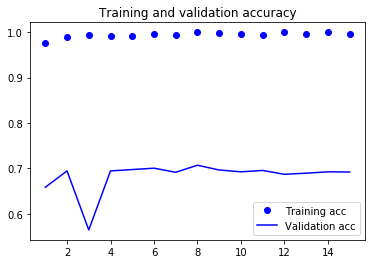

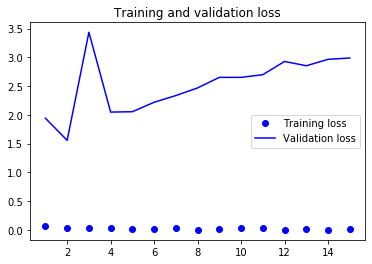

In [51]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

### 4. Keras network - with data augmentation
- This is the same network as above but with data augumentation
- With this implemetation, the accuracy was raised to around 80%
- My computer limits me to do another run, but I would add a preprocessing_function to trim all images and see if that gives better results

In [54]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(424, 424, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [130]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(
        dataframe = train_df,
        directory = path,
        x_col="GalaxyID",
        y_col="GalaxyType",
        target_size = (424, 424),
        batch_size = 40,
        class_mode = 'binary')

validation_generator = test_datagen.flow_from_dataframe(
        dataframe = valid_df,
        directory = path,
        x_col="GalaxyID",
        y_col="GalaxyType",
        target_size = (424, 424),
        batch_size = 40,
        class_mode = 'binary')

Found 1200 validated image filenames belonging to 2 classes.
Found 800 validated image filenames belonging to 2 classes.


In [58]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch = 100,
      epochs = 20,
      validation_data = validation_generator,
      validation_steps = 50)

Epoch 1/20
100/100 [==============================] - 2275s - loss: 0.6303 - acc: 0.6508 - val_loss: 0.6021 - val_acc: 0.6515
Epoch 2/20
100/100 [==============================] - 2242s - loss: 0.5953 - acc: 0.6897 - val_loss: 0.5407 - val_acc: 0.7490
Epoch 3/20
100/100 [==============================] - 2229s - loss: 0.5725 - acc: 0.7115 - val_loss: 0.5568 - val_acc: 0.7260
Epoch 4/20
100/100 [==============================] - 2221s - loss: 0.5563 - acc: 0.7228 - val_loss: 0.5231 - val_acc: 0.7670
Epoch 5/20
100/100 [==============================] - 2229s - loss: 0.5368 - acc: 0.7450 - val_loss: 0.5034 - val_acc: 0.7705
Epoch 6/20
100/100 [==============================] - 2323s - loss: 0.5223 - acc: 0.7510 - val_loss: 0.4991 - val_acc: 0.7775
Epoch 7/20
100/100 [==============================] - 2273s - loss: 0.5194 - acc: 0.7520 - val_loss: 0.4987 - val_acc: 0.7480
Epoch 8/20
100/100 [==============================] - 2534s - loss: 0.5046 - acc: 0.7630 - val_loss: 0.4549 - val_acc:

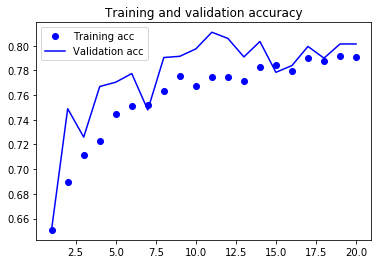

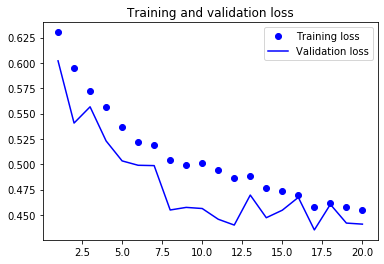

In [59]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [60]:
model.save('galaxy1.h5')

### 5. Network- VGG16 architecture with fine tuning

- Not ran because it was taking too long...

In [4]:
from keras.applications import VGG16
conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(424, 424, 3))

conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [5]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [6]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 13, 13, 512)       14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 86528)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               22151424  
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 36,866,369
Trainable params: 29,231,105
Non-trainable params: 7,635,264
_________________________________________________________________


In [7]:
from keras_preprocessing.image import ImageDataGenerator

train_df, valid_df = train_test_split(df_sample, test_size = 0.4)
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
path = 'projects/neural_nets/galaxy_zoo/images_training_rev1/'


train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(
    dataframe = train_df,
    directory = path,
    x_col="GalaxyID",
    y_col="GalaxyType",
    target_size = (424, 424),
    batch_size = 40,
    class_mode = 'binary')

validation_generator = test_datagen.flow_from_dataframe(
    dataframe = valid_df,
    directory = path,
    x_col="GalaxyID",
    y_col="GalaxyType",
    target_size = (424, 424),
    batch_size = 40,
    class_mode = 'binary')

Found 1200 validated image filenames belonging to 2 classes.
Found 800 validated image filenames belonging to 2 classes.


In [8]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs = 20,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/20
100/100 [==============================] - 36890s - loss: 0.7009 - acc: 0.5605 - val_loss: 0.6195 - val_acc: 0.6650
Epoch 2/20
 99/100 [============================>.] - ETA: 266s - loss: 0.6090 - acc: 0.6717

KeyboardInterrupt: 